<a href="https://colab.research.google.com/github/Ziannnniiii/2025_AI_TI1B/blob/main/Jobsheet8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jobsheet 8 Supervise Learning Regression dan Classification

# Latihan 1

In [5]:
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris.info()
iris.head()
iris.drop('Id', axis=1, inplace=True)

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ', acc_score)

print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file="iris_tree.dot",
    feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded=True,
    filled=True
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Accuracy:  0.933
Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Latihan 2

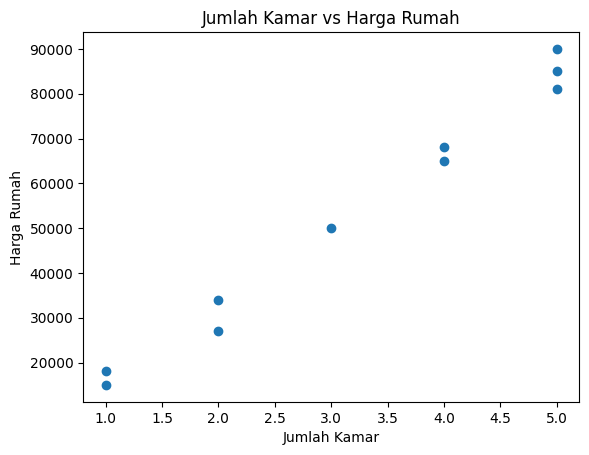

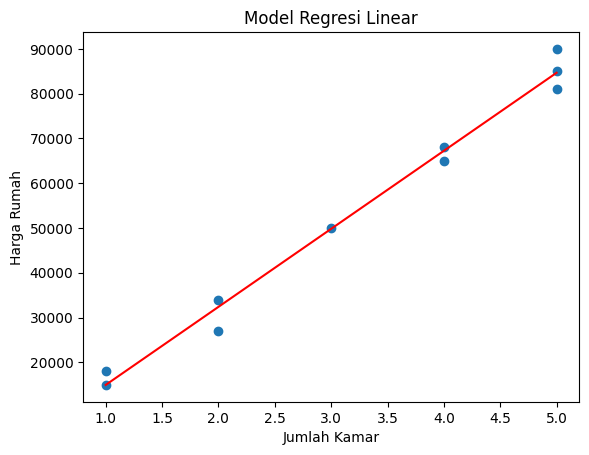

Jumlah kamar: 6
Prediksi harga kamar: 102110

Jumlah kamar: 7
Prediksi harga kamar: 119542

Score: 1.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

plt.scatter(bedrooms, house_price)
plt.xlabel("Jumlah Kamar")
plt.ylabel("Harga Rumah")
plt.title("Jumlah Kamar vs Harga Rumah")
plt.show()

bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms), color='red')
plt.xlabel("Jumlah Kamar")
plt.ylabel("Harga Rumah")
plt.title("Model Regresi Linear")
plt.show()

X_test = np.array([[6], [7]])

y_pred = linreg.predict(X_test)
i
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", int(y_pred[i]))
    print()

print("Score:", linreg.score(X_test, y_pred))


# Latihan 3

In [14]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.info()

data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data[predictions]
y = data['Purchased']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


0.825